# INSTALLING LIBRARIES

In [1]:
!pip install emoji
!pip install WordCloud
!pip install STOPWORDS


# IMPORTING LIBRARIES AND MODULES

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
##from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

# FUNCTION FOR PARSING DATE & TIME

In [3]:
def startsWithDateAndTime(s):
    """
    Check if a string starts with a date and time in the format 'dd/mm/yyyy, hh:mm AM/PM -'

    Args:
        s (str): The string to check.

    Returns:
        bool: True if the string starts with a date and time, False otherwise.
    """
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    try:
        result = re.match(pattern, s)
        if result:
            return True
        else:
            return False
    except TypeError:
        print("TypeError: 'NoneType' object is not iterable")
        return False


# FUNCTION FOR EXTRACTING AUTHOR NAMES

In [4]:
### Regex pattern to extract username of Author.

def FindAuthor(s):
    s = s.split(":")
    if len(s)>=2:
        return True
    else:
        return False
    
# def FindAuthor(s):
#     patterns = [
#         '([w]+):',                        # First Name
#         '([w]+[s]+[w]+):',              # First Name + Last Name
#         '([w]+[s]+[w]+[s]+[w]+):',    # First Name + Middle Name + Last Name
#         '([+]d{2} d{5} d{5}):',         # Mobile Number (India no.)
#         '([+]d{2} d{3} d{3} d{4}):',   # Mobile Number (US no.)
#         '([w]+)[u263a-U0001f999]+:',    # Name and Emoji              
#     ]
#     pattern = '^' + '|'.join(patterns)
#     result = re.match(pattern, s)
#     if result:
#         return True
#     return False



### Extracting Date, Time, Author and message from the chat file.

# Creating a dataframe and storing all data inside that dataframe

In [5]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = " ".join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message



# UPLOAD EXPORTED WHATSAPP CHAT - CONVERT INTO DATAFRAME

In [6]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = 'New WhatsApp Chat with MINI PROJECT.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
### changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])
df

Date   Time        Author  \
0    2021-11-17  21:23          None   
1    2021-11-17  21:40    Thanoj CSE   
2    2021-11-17  21:40    Thanoj CSE   
3    2021-11-17  21:40    Thanoj CSE   
4    2021-11-17  21:41    Thanoj CSE   
...         ...    ...           ...   
2872 2023-03-24  19:53  Kiranmai clg   
2873 2023-03-24  19:53     Saba Khan   
2874 2023-03-24  19:54     Saba Khan   
2875 2023-03-24  19:54     Saba Khan   
2876 2023-03-24  21:20     Saba Khan   

                                                Message  
0                      You created group "MINI PROJECT"  
1                                              Hii guys  
2                   Repu mana guide sir ni meet avudham  
3                  Project gurinchi adigi thelusukundam  
4                         Malli domain select cheydam 👍  
...                                                 ...  
2872  HoD sir, dean and class incharge will b thr mo...  
2873                                               Okay  
2874   If anything is informed, then please let me know  
2875        So repu aite undadu antunaru maximum people  
2876                                          Postponed  

[2877 rows x 4 columns]

# EXPLORING DATAFRAME

In [7]:
# Checking shape of dataset.
print("Shape of dataset:", df.shape)

Shape of dataset: (2877, 4)


In [8]:
# Checking basic information of dataset.
print("Basic information of dataset:")
df.info()


Basic information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2877 non-null   datetime64[ns]
 1   Time     2877 non-null   object        
 2   Author   2875 non-null   object        
 3   Message  2877 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 90.0+ KB


In [9]:
# Checking no. of null values in dataset.
print("Number of null values in dataset:")
print(df.isnull().sum())


Number of null values in dataset:
Date       0
Time       0
Author     2
Message    0
dtype: int64


In [10]:
df[df['Author'].isna()].tail()

Date   Time Author                           Message
0  2021-11-17  21:23   None  You created group "MINI PROJECT"
15 2021-11-20  10:30   None         Thanoj CSE started a call

In [11]:
# Checking head part of dataset.
print("Head part of dataset:")
df.head(50)

Head part of dataset:


Date   Time        Author  \
0  2021-11-17  21:23          None   
1  2021-11-17  21:40    Thanoj CSE   
2  2021-11-17  21:40    Thanoj CSE   
3  2021-11-17  21:40    Thanoj CSE   
4  2021-11-17  21:41    Thanoj CSE   
5  2021-11-17  21:43     Saba Khan   
6  2021-11-17  21:47    Thanoj CSE   
7  2021-11-17  21:47     Saba Khan   
8  2021-11-17  21:49  Kiranmai clg   
9  2021-11-17  21:49     Saba Khan   
10 2021-11-17  21:52    Thanoj CSE   
11 2021-11-17  22:16     Saba Khan   
12 2021-11-17  22:43    Thanoj CSE   
13 2021-11-20  09:49     Saba Khan   
14 2021-11-20  10:30    Thanoj CSE   
15 2021-11-20  10:30          None   
16 2021-11-20  10:32    Thanoj CSE   
17 2021-11-20  10:32    Thanoj CSE   
18 2021-11-21  14:08     Saba Khan   
19 2021-11-21  14:09     Saba Khan   
20 2021-11-21  14:09     Saba Khan   
21 2021-11-21  14:22    Thanoj CSE   
22 2021-11-21  14:22     Saba Khan   
23 2021-11-21  14:23    Thanoj CSE   
24 2021-11-21  14:23    Thanoj CSE   
25 2021-11-21  14:28     Saba Khan   
26 2021-11-21  14:34     Saba Khan   
27 2021-11-21  14:35     Saba Khan   
28 2021-11-21  14:35     Saba Khan   
29 2021-11-21  14:41     Saba Khan   
30 2021-11-21  14:47    Thanoj CSE   
31 2021-11-21  14:48     Saba Khan   
32 2021-11-21  15:03     Saba Khan   
33 2021-11-21  15:03     Saba Khan   
34 2021-11-21  15:14     Saba Khan   
35 2021-11-21  15:24     Saba Khan   
36 2021-11-21  15:24     Saba Khan   
37 2021-11-21  15:32  Kiranmai clg   
38 2021-11-21  15:32  Kiranmai clg   
39 2021-11-21  15:33     Saba Khan   
40 2021-11-21  15:33  Kiranmai clg   
41 2021-11-21  15:34     Saba Khan   
42 2021-11-21  15:34     Saba Khan   
43 2021-11-21  15:34  Kiranmai clg   
44 2021-11-21  15:35     Saba Khan   
45 2021-11-21  15:35     Saba Khan   
46 2021-11-21  15:36  Kiranmai clg   
47 2021-11-21  15:37  Kiranmai clg   
48 2021-11-21  15:37     Saba Khan   
49 2021-11-21  15:37     Saba Khan   

                                              Message  
0                    You created group "MINI PROJECT"  
1                                            Hii guys  
2                 Repu mana guide sir ni meet avudham  
3                Project gurinchi adigi thelusukundam  
4                       Malli domain select cheydam 👍  
5   Sure sure..podunna AI class ayipoyaka sir vell...  
6              12:20 ki veldham le elago kaline kadha  
7                    sir available untaro ledo appudu  
8                                    Okie after class  
9   lekunte adugudam after class sir ki 12:20 ki a...  
10                                   Ha adigi veldham  
11                                               okay  
12                                             Okay 👍  
13               mentoring appudu sir deggara podama?  
14                                 Nen intiki veltuna  
15                          Thanoj CSE started a call  
16                                 Saba I am kiranmai  
17              Ma'am told v need to attend mentoring  
18                             emaina search chesara?  
19  actually i have an event on wednesday and aaro...  
20                                            aaroje*  
21                                                 Ok  
22      sorry for imposing the first work on you both  
23                                 It's kk no problem  
24                                      It's our work  
25                                                 :)  
26  https://www.upgrad.com/blog/common-data-mining...  
27            dintlo c4.5 algorithm ki idi undi okati  
28                 https://github.com/barisesmer/C4.5  
29  Can be used as reference while framing report ...  
30                                               Ok 👍  
31  idi anta detail lo undi but source code ledu a...  
32                           You deleted this message  
33  idi face recognition di undi code and evrythin...  
34  This one's the best i found till now:https://w...  
35                           You deleted this message 

In [12]:
# Checking tail part of dataset.
print("Tail part of dataset:")
df.tail(50)


Tail part of dataset:


Date   Time        Author  \
2827 2023-03-20  11:11  Kiranmai clg   
2828 2023-03-20  11:11  Kiranmai clg   
2829 2023-03-20  11:11  Kiranmai clg   
2830 2023-03-20  11:11     Saba Khan   
2831 2023-03-20  11:11     Saba Khan   
2832 2023-03-20  11:11  Kiranmai clg   
2833 2023-03-20  11:11  Kiranmai clg   
2834 2023-03-20  11:11     Saba Khan   
2835 2023-03-20  11:11     Saba Khan   
2836 2023-03-20  11:11  Kiranmai clg   
2837 2023-03-20  11:12  Kiranmai clg   
2838 2023-03-20  11:12  Kiranmai clg   
2839 2023-03-20  12:01  Kiranmai clg   
2840 2023-03-20  12:02  Kiranmai clg   
2841 2023-03-21  19:58     Saba Khan   
2842 2023-03-21  19:58     Saba Khan   
2843 2023-03-21  19:58     Saba Khan   
2844 2023-03-21  19:58     Saba Khan   
2845 2023-03-21  19:59     Saba Khan   
2846 2023-03-21  19:59     Saba Khan   
2847 2023-03-21  20:16  Kiranmai clg   
2848 2023-03-21  20:17  Kiranmai clg   
2849 2023-03-21  20:17  Kiranmai clg   
2850 2023-03-21  20:17     Saba Khan   
2851 2023-03-21  20:17     Saba Khan   
2852 2023-03-21  20:17     Saba Khan   
2853 2023-03-21  20:17  Kiranmai clg   
2854 2023-03-21  20:18  Kiranmai clg   
2855 2023-03-21  20:21     Saba Khan   
2856 2023-03-23  08:37  Kiranmai clg   
2857 2023-03-23  08:40  Kiranmai clg   
2858 2023-03-23  11:07     Saba Khan   
2859 2023-03-23  11:07     Saba Khan   
2860 2023-03-23  11:07     Saba Khan   
2861 2023-03-23  11:08     Saba Khan   
2862 2023-03-23  11:09  Kiranmai clg   
2863 2023-03-23  11:09  Kiranmai clg   
2864 2023-03-23  11:09  Kiranmai clg   
2865 2023-03-24  10:49     Saba Khan   
2866 2023-03-24  11:00    Thanoj CSE   
2867 2023-03-24  11:34  Kiranmai clg   
2868 2023-03-24  19:50     Saba Khan   
2869 2023-03-24  19:50     Saba Khan   
2870 2023-03-24  19:50     Saba Khan   
2871 2023-03-24  19:52  Kiranmai clg   
2872 2023-03-24  19:53  Kiranmai clg   
2873 2023-03-24  19:53     Saba Khan   
2874 2023-03-24  19:54     Saba Khan   
2875 2023-03-24  19:54     Saba Khan   
2876 2023-03-24  21:20     Saba Khan   

                                                Message  
2827                                              Owwww  
2828                    Hope they don't notice all that  
2829                                                  🤞  
2830                                               haaa  
2831                                          hoping so  
2832                                            Ok byee  
2833                                         U carry on  
2834                              Thank you so much bro  
2835                                               🫰🏻🫰🏻  
2836                                                  😄  
2837  U just send me the output screenshots so that ...  
2838                                      When u r free  
2839    Saba can u please check for performance metrics  
2840  Ma'am is telling if that's not done ... we can...  
2841               bro needi unsupervised learning kada  
2842                           confusion matrix enduku?  
2843                             avi ekkad nundi vastay  
2844                  supervised aithe emaina ankovachu  
2845                                    <Media omitted>  
2846                             incorporated this part  
2847                                Genius man Thanks 🫂  
2848                                         Adhey kada  
2849                 And performance metrics anything?!  
2850                                         trying bro  
2851                                   stuck at a place  
2852                 asked for help from an acquintance  
2853                                               Okie  
2854  Idk y these people don't understand and assume...  
2855                                            exactly  
2856  Saba I'm not changing code in documentation. I...  
2857             But mail the modified code to 595 saba  
2858                      Tried but getting an error..🥲  
2859  It's taking longer than I expected. And also m... 

# CLEANING DATASET

In [13]:
# Dropping NaN values from dataset.
df = df.dropna()
df = df.reset_index(drop=True)
print("Shape of dataset after dropping NaN values:", df.shape)


Shape of dataset after dropping NaN values: (2875, 4)


In [14]:
# Checking no. of authors in the group.
print("Number of authors in the group:", df['Author'].nunique())


Number of authors in the group: 3


In [15]:
# Checking authors in the group.
print("Authors in the group:", df['Author'].unique())

Authors in the group: ['Thanoj CSE' 'Saba Khan' 'Kiranmai clg']


# STEP BY STEP FEATURE ENGINEERING

In [16]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)
print("Added 'Day' column:\n", df.head())

### Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]
print("Columns rearranged:\n", df.head())

### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')
print("Changed datatype of 'Day' column:\n", df.head())

### Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s : len(s))
print("Added 'Letters' column:\n", df.head())

### Counting number of word's in each message
df['Words'] = df['Message'].apply(lambda s : len(s.split(' ')))
print("Added 'Words' column:\n", df.head())

### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
print("Added 'Url_Count' column with a total count of", links, "links:\n", df.head())


### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
print("Added 'Media_Count' column with a total count of", media, "media files:\n", df.head())


Added 'Day' column:
         Date   Time      Author  \
0 2021-11-17  21:40  Thanoj CSE   
1 2021-11-17  21:40  Thanoj CSE   
2 2021-11-17  21:40  Thanoj CSE   
3 2021-11-17  21:41  Thanoj CSE   
4 2021-11-17  21:43   Saba Khan   

                                             Message        Day  
0                                           Hii guys  Wednesday  
1                Repu mana guide sir ni meet avudham  Wednesday  
2               Project gurinchi adigi thelusukundam  Wednesday  
3                      Malli domain select cheydam 👍  Wednesday  
4  Sure sure..podunna AI class ayipoyaka sir vell...  Wednesday  
Columns rearranged:
         Date        Day   Time      Author  \
0 2021-11-17  Wednesday  21:40  Thanoj CSE   
1 2021-11-17  Wednesday  21:40  Thanoj CSE   
2 2021-11-17  Wednesday  21:40  Thanoj CSE   
3 2021-11-17  Wednesday  21:41  Thanoj CSE   
4 2021-11-17  Wednesday  21:43   Saba Khan   

                                             Message  
0                  

# EMOJI EXTRACTION

In [17]:
from emoji import EMOJI_DATA

def split_count(text):
    all_emojis = list(EMOJI_DATA.keys())
    emoji_count = sum([text.count(emoj) for emoj in EMOJI_DATA])
    listed_emojis = ','.join(regex.findall(f"[{''.join(all_emojis)}]", text))
    return listed_emojis

df['emoji']=df["Message"].apply(split_count)
df['emoji'] = df['emoji'].str.replace(r'\d+', '', regex=True)
special_characters=['@','#','$','*','&',',']
for i in special_characters:
    df['emoji'] = df['emoji'].str.replace(re.escape(i), '', regex=True)

emojis = sum(df['emoji'].str.len())
print(emojis)

566


# EMOJI PIE CHART

In [18]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Manually create a dictionary that maps each emoji to its category
emoji_categories = {
    "😀": "HAPPY",
    "😖": "SAD",
    "🙄": "TIRED",
    "🤩": "CELEBRATE",
    "🥳": "PARTY",
    "😭": "CRY",
    "🥹": "HAPPY TEARS",
    "😂": "LAUGH",
    "❤️": "HEARTS",
    "👍": "OKAY",
    "🤦🏻‍♀️": "FACE PALM",
    "😵‍💫": "CONFUSED",
    "👏": "CLAPS",
    "😌": "RELIEVED",
    "✔️": "RIGHT",
    "🤞": "FINGERS CROSSED",
    "🫂": "HUG",
    "🫣": "SHOCKED",
    "🙏": "HIGH-FIVE",
    "😬": "STRUCK",
    "🔥": "LIT",
    "🤔": "THINK",
    "😍": "LOVED IT"
}

# Extract all the emojis used in the messages and count their occurrences
emoji_counts = Counter([emoji for message in df.Message for emoji in message.split() if emoji in emoji_categories])

# Group the emojis by category and calculate the count and percentage of each category
category_counts = {}
total_count = sum(emoji_counts.values())
for emoji, count in emoji_counts.items():
    category = emoji_categories[emoji]
    if category not in category_counts:
        category_counts[category] = {"count": 0, "percentage": 0}
    category_counts[category]["count"] += count
    category_counts[category]["percentage"] = category_counts[category]["count"] / total_count * 100

# Convert the category counts to a dataframe
category_df = pd.DataFrame.from_dict(category_counts, orient='index').reset_index().rename(columns={'index': 'category'})

# Create a pie chart showing the count and percentage of each category
fig = px.pie(category_df, values='count', names='category',title='Emojis by Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='outside', textinfo='percent+label',marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Most Commonly Used Emojis', title_x=0.5)
fig.show()


# STATISTICS OF OVERALL CHAT

In [19]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print("Number of Emojis Shared", emojis)
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 2875
Total Number of Media Messages : 271
Number of Emojis Shared 566
Total Number of Links : 82


# STATISTICS OF INDIVIDUAL MEMBERS

In [20]:
l = df.Author.unique()

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df = df[df["Author"] == l[i]]
    
    # req_df will contain messages of only one particular user
    print(f'--> Stats of {l[i]} <--')
    
    # Shape will print number of rows which indirectly means the number of messages
    print('Total Message Sent: ', req_df.shape[0])
    
    # Word_Count contains of total words in one message. Sum of all words / Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Words'])) / req_df.shape[0]
    w_p_m = ("%.3f" % round(words_per_message, 2))  
    print('Average Words per Message: ', w_p_m)
    
    # Media consists of media messages
    media = sum(req_df["Media_Count"])
    print('Total Media Message Sent: ', media)
    
    # Links consist of total links
    links = sum(req_df["Url_Count"])   
    print('Total Links Sent: ', links)
    
    print()
    print('----------------------------------------------------------')


--> Stats of Thanoj CSE <--
Total Message Sent:  282
Average Words per Message:  4.550
Total Media Message Sent:  41
Total Links Sent:  4

----------------------------------------------------------
--> Stats of Saba Khan <--
Total Message Sent:  1463
Average Words per Message:  5.290
Total Media Message Sent:  115
Total Links Sent:  65

----------------------------------------------------------
--> Stats of Kiranmai clg <--
Total Message Sent:  1130
Average Words per Message:  4.130
Total Media Message Sent:  115
Total Links Sent:  13

----------------------------------------------------------


In [21]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arbu8\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# SENTIMENT ANALYSIS OF EACH MESSAGE

In [22]:
data = df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
#data["Positive"]=data["Positive"].astype(int).astype(str)
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
#data["Negative"]=data["Negative"].astype(int).astype(str)
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
#data["Neutral"]=data["Neutral"].astype(int).astype(str)
#dfmi.loc[:, ('one', 'second')]
data

Date        Day   Time        Author  \
0    2021-11-17  Wednesday  21:40    Thanoj CSE   
1    2021-11-17  Wednesday  21:40    Thanoj CSE   
2    2021-11-17  Wednesday  21:40    Thanoj CSE   
3    2021-11-17  Wednesday  21:41    Thanoj CSE   
4    2021-11-17  Wednesday  21:43     Saba Khan   
...         ...        ...    ...           ...   
2870 2023-03-24     Friday  19:53  Kiranmai clg   
2871 2023-03-24     Friday  19:53     Saba Khan   
2872 2023-03-24     Friday  19:54     Saba Khan   
2873 2023-03-24     Friday  19:54     Saba Khan   
2874 2023-03-24     Friday  21:20     Saba Khan   

                                                Message  Letters  Words  \
0                                              Hii guys        8      2   
1                   Repu mana guide sir ni meet avudham       35      7   
2                  Project gurinchi adigi thelusukundam       36      4   
3                         Malli domain select cheydam 👍       29      5   
4     Sure sure..podunna AI class ayipoyaka sir vell...       64      9   
...                                                 ...      ...    ...   
2870  HoD sir, dean and class incharge will b thr mo...       50     10   
2871                                               Okay        4      1   
2872   If anything is informed, then please let me know       48      9   
2873        So repu aite undadu antunaru maximum people       43      7   
2874                                          Postponed        9      1   

      Url_Count  Media_Count emoji  Positive  Negative  Neutral  
0             0            0           0.000       0.0    1.000  
1             0            0           0.000       0.0    1.000  
2             0            0           0.000       0.0    1.000  
3             0            0     👍     0.000       0.0    1.000  
4             0            0           0.223       0.0    0.777  
...         ...          ...   ...       ...       ...      ...  
2870          0            0           0.000       0.0    1.000  
2871          0            0           1.000       0.0    0.000  
2872          0            0           0.223       0.0    0.777  
2873          0            0           0.000       0.0    1.000  
2874          0            0           0.000       1.0    0.000  

[2875 rows x 13 columns]

# OVERALL SENTIMENT ANALYSIS

In [23]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        return "Positive 😊"
    elif (b>a) and (b>c):
        return "Negative 😠"
    else:
        return "Neutral 🙂"
        
print(sentiment_score(x, y, z))


Neutral 🙂


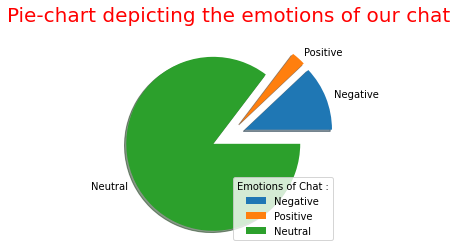

<Figure size 1152x1440 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([x,y,z])
mylabels = ["Negative", "Positive", "Neutral"]

myexplode = [0.2, 0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, center=(0,0))
plt.legend(title="Emotions of Chat :",loc='lower right')
plt.title('Pie-chart depicting the emotions of our chat',loc='center',color='r',fontsize=20)
plt.figure(figsize=(16,20))
plt.show()


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data["Message"]).toarray()
print(X.shape)
print(X)

(2875, 2500)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# VISUALISATION OF WORDS USING CLOUD 

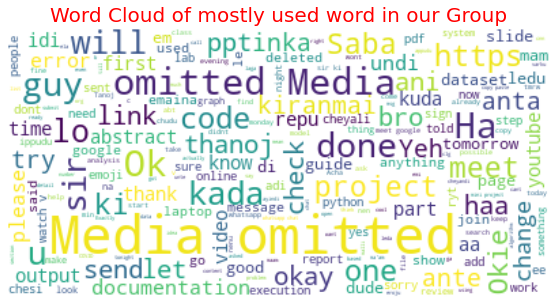

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all messages into a single string
text = " ".join(review for review in df.Message)

# Generate word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of mostly used word in our Group',loc='center',color='r',fontsize=20)
plt.axis("off")
plt.show()


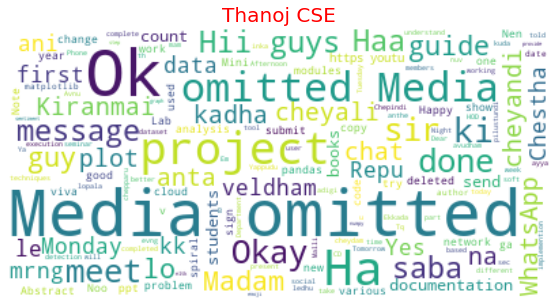

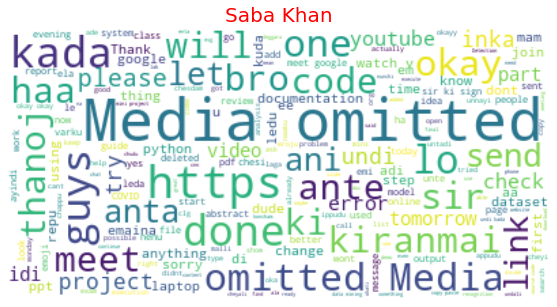

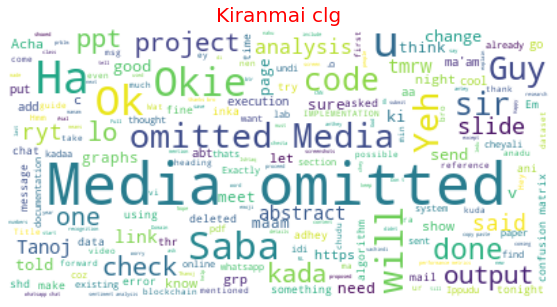

In [27]:
##Individual word clouds

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Select unique authors in the DataFrame
authors = df.Author.unique()

# Loop through each author and generate a word cloud
for author in authors:
    # Select messages written by the current author
    messages = df.Message[df.Author == author]
    # Join all the messages into a single string
    text = " ".join(message for message in messages)
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white").generate(text)
    # Display the generated image
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(author, fontsize=20, color='r')
    plt.show()


In [28]:
l = df.Author.unique()

for i in range(len(l)):
    req_df = df[df["Author"] == l[i]]
    num_messages = req_df.shape[0]
    print(f"{l[i]} sent {num_messages} messages.")
    
    # Add a blank line between authors for readability
    if i < len(l) - 1:
        print()


Thanoj CSE sent 282 messages.

Saba Khan sent 1463 messages.

Kiranmai clg sent 1130 messages.


# ANALYSIS OF ACTIVITY BY EACH MEMBER THROUGHOUT THE WEEK

In [29]:
authors = df.Author.unique()
for author in authors:
    print(f"Messages by {author}:")
    print()
    days = df[df.Author == author].Day.unique()
    for day in days:
        req_df = df[(df.Author == author) & (df.Day == day)]
        print(f"  {day} -> {req_df.shape[0]}")
    print()
        
        


Messages by Thanoj CSE:

  Wednesday -> 40
  Saturday -> 47
  Sunday -> 14
  Tuesday -> 44
  Thursday -> 60
  Friday -> 31
  Monday -> 46

Messages by Saba Khan:

  Wednesday -> 173
  Saturday -> 128
  Sunday -> 228
  Monday -> 211
  Tuesday -> 262
  Thursday -> 327
  Friday -> 134

Messages by Kiranmai clg:

  Wednesday -> 147
  Sunday -> 162
  Monday -> 146
  Tuesday -> 170
  Thursday -> 310
  Friday -> 123
  Saturday -> 72



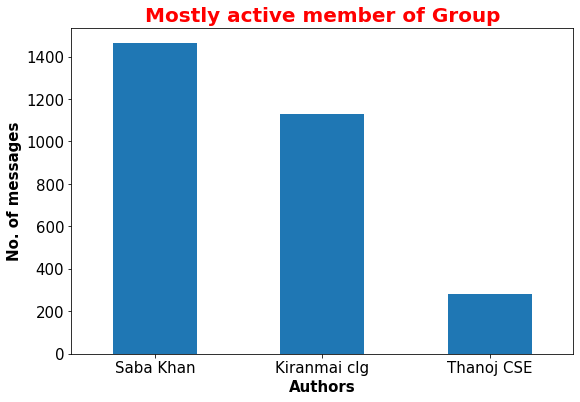

In [30]:
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
mostly_active.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 15,'fontweight':'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 15,'fontweight': 'bold'})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


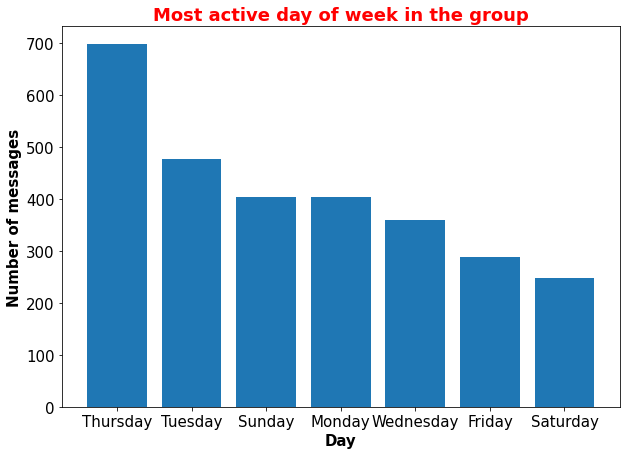

In [31]:
import matplotlib.pyplot as plt

# Count the number of messages per day
messages_per_day = df['Day'].value_counts()

# Select the top 10 most active days
top_days = messages_per_day.head(10)

# Plot a bar chart of the top 10 most active days
plt.figure(figsize=(10,7))
plt.bar(top_days.index, top_days.values)
plt.xlabel('Day', fontdict={'fontsize': 15, 'fontweight':  'bold'})
plt.ylabel('Number of messages', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Most active day of week in the group', fontdict={'fontsize': 18, 'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


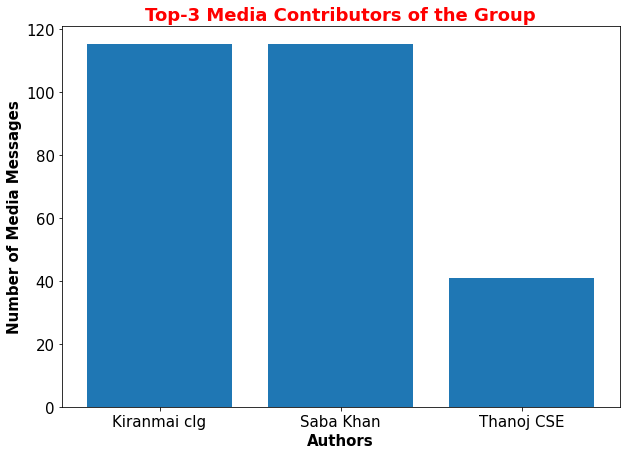

In [32]:
# Get all the messages containing media files
media_messages = df[df['Message'] == '<Media omitted>']

# Count the number of media messages sent by each author
media_counts = media_messages['Author'].value_counts()

# Get the top 3 media contributors
top_3 = media_counts.head(3)

# Create a bar chart to display the top 3 media contributors
plt.figure(figsize=(10,7))
plt.bar(top_3.index, top_3.values)
plt.xlabel('Authors', fontsize=15, fontweight='bold')
plt.ylabel('Number of Media Messages', fontsize=15, fontweight='bold')
plt.title('Top-3 Media Contributors of the Group', fontsize=18, fontweight='bold',color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


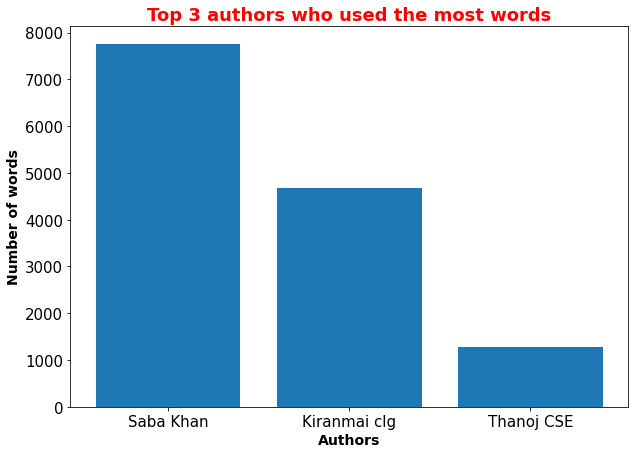

In [33]:
# Group by author and sum up the number of words
max_words = df.groupby('Author')['Words'].sum()

# Sort the data in descending order and select the top 3 authors
top_authors = max_words.sort_values(ascending=False).head(3)

# Create a bar chart to visualize the data
plt.figure(figsize=(10,7))
plt.bar(top_authors.index, top_authors.values)
plt.xlabel('Authors', fontsize=14,fontweight='bold')
plt.ylabel('Number of words', fontsize=14,fontweight='bold')
plt.title('Top 3 authors who used the most words', fontsize=18,fontweight='bold',color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


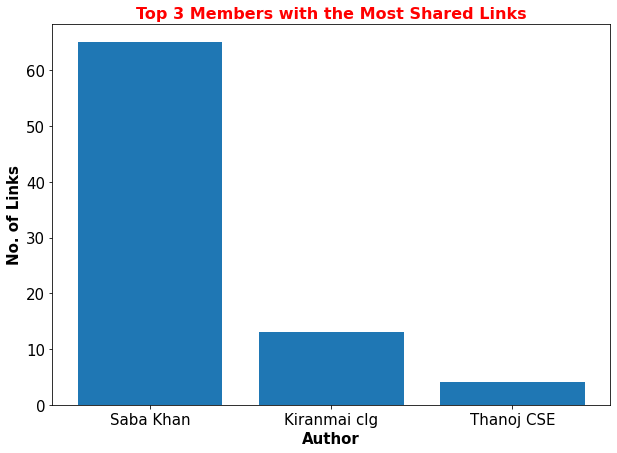

In [34]:
max_links = df[['Author', 'Url_Count']].groupby('Author').sum()
top_links = max_links.sort_values('Url_Count', ascending=False).head(3)

plt.figure(figsize=(10, 7))
plt.bar(top_links.index, top_links['Url_Count'])
plt.xlabel('Author', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('No. of Links', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Top 3 Members with the Most Shared Links', fontdict={'fontsize': 16, 'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


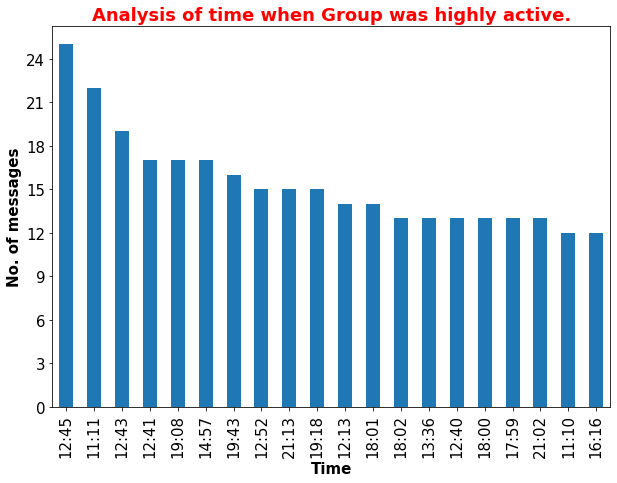

In [35]:
### Time whenever our group is highly active
plt.figure(figsize=(10,7))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 15,'fontweight': 'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 15,'fontweight': 'bold'})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()

In [36]:
df['Hours'] = df['Time'].apply(lambda x : x.split(':')[0])

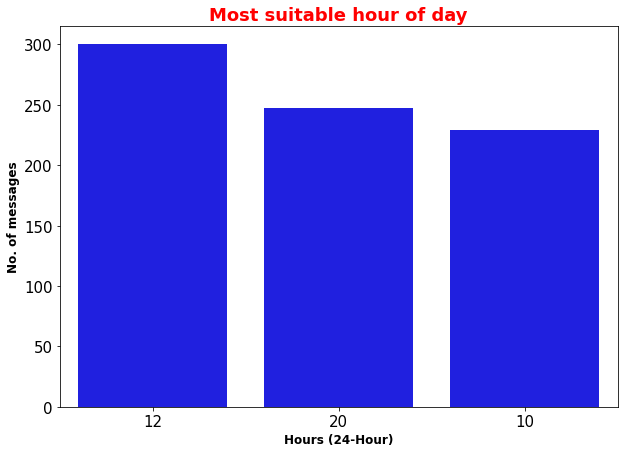

In [37]:
import seaborn as sns

plt.figure(figsize=(10,7))
std_time = df['Hours'].value_counts().head(3)
sns.barplot(x=std_time.index, y=std_time.values, color='blue')
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 'bold'})
plt.title('Most suitable hour of day',fontdict={'fontsize': 18,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


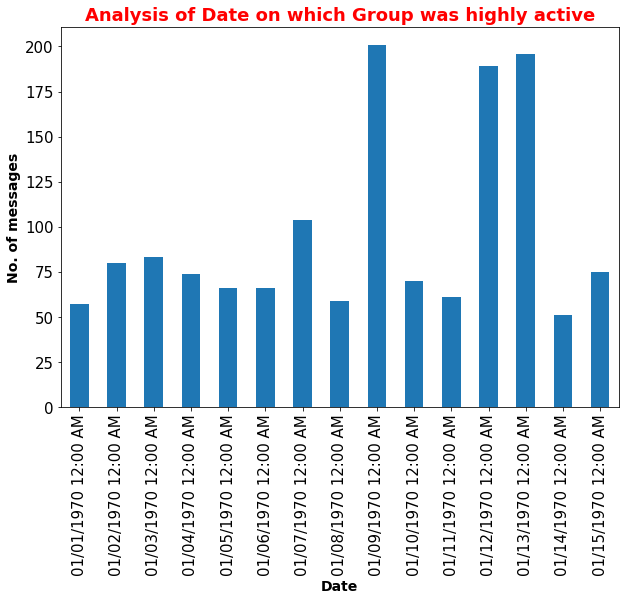

In [38]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,7))
date_count = df['Date'].value_counts().head(15)
date_count.index = pd.to_datetime(date_count.index) # convert index to datetime format
date_count = date_count.sort_index() # sort the dates in ascending order
date_count.plot.bar()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M %p'))
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()


In [39]:
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot 
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of messages using TimeSeries plot', 
                  title_x=0.5,
                  title_font_color='red',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.update_yaxes(nticks=20)
fig.show()

In [40]:
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

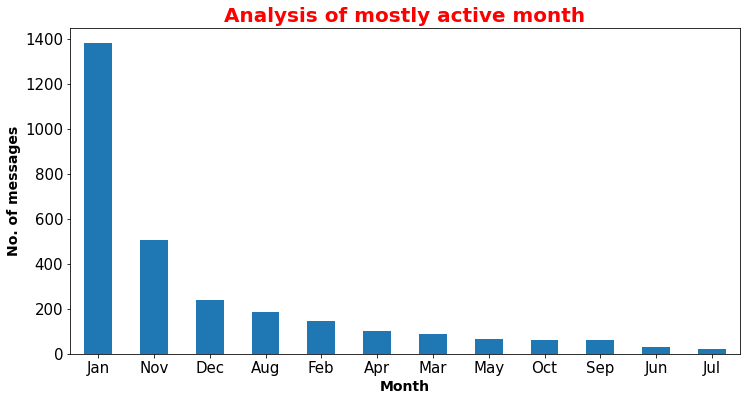

In [41]:
plt.figure(figsize=(12,6))
active_month = df['Month'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.title('Analysis of mostly active month',fontdict={'fontsize': 20,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


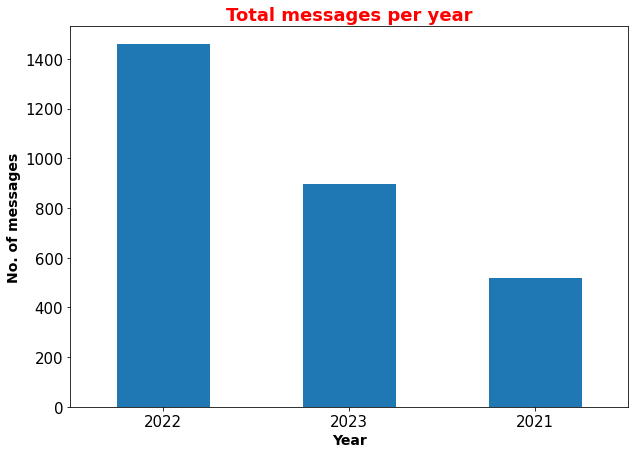

In [42]:

plt.figure(figsize=(10,7))
df['Year'].value_counts().plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 'bold'})
plt.title('Total messages per year',fontdict={'fontsize': 18,'fontweight': 'bold'},color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


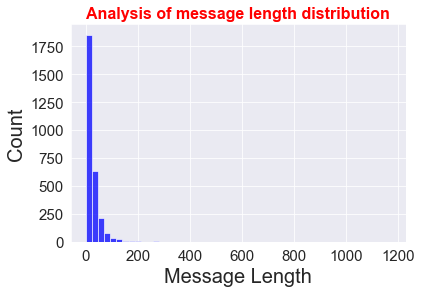

In [43]:
# Calculate the length of each message
message_lengths = df['Message'].apply(len)

# Create a histogram of the message lengths
sns.set_style('darkgrid')
sns.histplot(message_lengths, color='blue', bins=50)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
plt.xlabel('Message Length', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Analysis of message length distribution', fontsize=16,fontweight='bold',color='r')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.show()


## Sentiment Analysis on Messages

In [44]:
#importing libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arbu8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbu8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
data1=df.loc[df['Url_Count'] ==0]

In [46]:
data1.head()

Date        Day   Time      Author  \
0 2021-11-17  Wednesday  21:40  Thanoj CSE   
1 2021-11-17  Wednesday  21:40  Thanoj CSE   
2 2021-11-17  Wednesday  21:40  Thanoj CSE   
3 2021-11-17  Wednesday  21:41  Thanoj CSE   
4 2021-11-17  Wednesday  21:43   Saba Khan   

                                             Message  Letters  Words  \
0                                           Hii guys        8      2   
1                Repu mana guide sir ni meet avudham       35      7   
2               Project gurinchi adigi thelusukundam       36      4   
3                      Malli domain select cheydam 👍       29      5   
4  Sure sure..podunna AI class ayipoyaka sir vell...       64      9   

   Url_Count  Media_Count emoji Hours  Msg_count  Year Month  
0          0            0          21         12  2021   Nov  
1          0            0          21         12  2021   Nov  
2          0            0          21         12  2021   Nov  
3          0            0     👍    21         12  2021   Nov  
4          0            0          21         12  2021   Nov

In [47]:
data1=data1.loc[:,['Message']]

In [48]:
data1

Message
0                                              Hii guys
1                   Repu mana guide sir ni meet avudham
2                  Project gurinchi adigi thelusukundam
3                         Malli domain select cheydam 👍
4     Sure sure..podunna AI class ayipoyaka sir vell...
...                                                 ...
2870  HoD sir, dean and class incharge will b thr mo...
2871                                               Okay
2872   If anything is informed, then please let me know
2873        So repu aite undadu antunaru maximum people
2874                                          Postponed

[2798 rows x 1 columns]

In [49]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["Message"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["Message"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["Message"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["Message"]]
score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1["Sentiment"] = sentiment
data1.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arbu8\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Message  Positive  Negative  \
0                                           Hii guys     0.000       0.0   
1                Repu mana guide sir ni meet avudham     0.000       0.0   
2               Project gurinchi adigi thelusukundam     0.000       0.0   
3                      Malli domain select cheydam 👍     0.000       0.0   
4  Sure sure..podunna AI class ayipoyaka sir vell...     0.223       0.0   

   Neutral  Compound Sentiment  
0    1.000    0.0000   Neutral  
1    1.000    0.0000   Neutral  
2    1.000    0.0000   Neutral  
3    1.000    0.0000   Neutral  
4    0.777    0.3182  Positive

In [50]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

Message Sentiment
0                                           Hii guys   Neutral
1                Repu mana guide sir ni meet avudham   Neutral
2               Project gurinchi adigi thelusukundam   Neutral
3                      Malli domain select cheydam 👍   Neutral
4  Sure sure..podunna AI class ayipoyaka sir vell...  Positive

In [51]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

In [52]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
      # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [53]:
nltk.download('omw-1.4')
data_copy = data2.copy()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arbu8\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [54]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [55]:
processed_data = {
    'Sentence':data_copy.Message,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

Sentence  Sentiment
0                                           Hii guys          1
1                Repu mana guide sir ni meet avudham          1
2               Project gurinchi adigi thelusukundam          1
3                      Malli domain select cheydam 👍          1
4  Sure sure..podunna AI class ayipoyaka sir vell...          2

In [56]:
processed_data['Sentiment'].value_counts()

1    2099
2     538
0     161
Name: Sentiment, dtype: int64

# 0 - NEGATIVE, 1 - NEUTRAL, 2 - POSITIVE


In [57]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [58]:
final_data['Sentiment'].value_counts()

2    538
0    205
1    205
Name: Sentiment, dtype: int64

In [59]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['struck now',
 'IDK dude🥲🥲🥲',
 'intlo emergency undi..cant come',
 'no use',
 'No not needed']

# CREATING AND TRAINING MODEL FOR SENTIMENTS USING GAUSSIAN NB

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# PERFORMANCE METRICS USING GAUSSIAN NB

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Define the new model to use
y_pred_gnb = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('Accuracy:', accuracy_gnb)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:\n", cm)

# Compute and print the precision, recall, and f1 score for each class
print("Precision, Recall, and F1 Score:")
print(classification_report(y_test, y_pred_gnb,target_names=['Negative-0', 'Neutral-1', 'Positive-2']))

Accuracy: 0.7263157894736842
Confusion Matrix:
 [[ 43   2   9]
 [  7  48  15]
 [  6  39 116]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.77      0.80      0.78        54
   Neutral-1       0.54      0.69      0.60        70
  Positive-2       0.83      0.72      0.77       161

    accuracy                           0.73       285
   macro avg       0.71      0.73      0.72       285
weighted avg       0.75      0.73      0.73       285



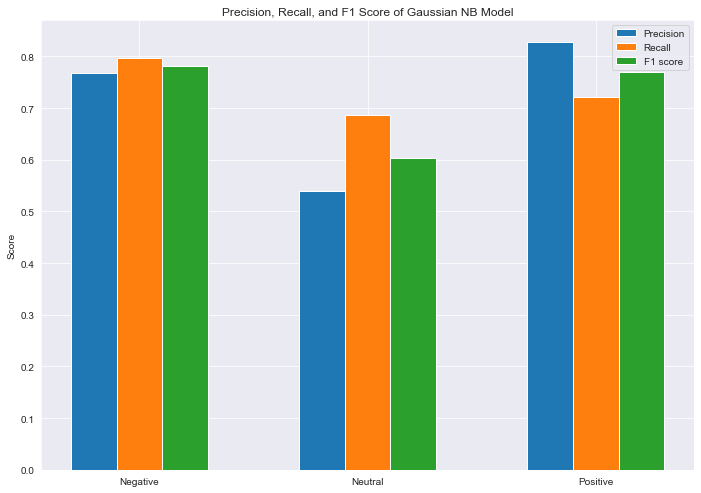

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_gnb, average=None), recall_score(y_test, y_pred_gnb, average=None), f1_score(y_test, y_pred_gnb, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Gaussian NB Model')
ax.legend()
plt.show()


# CREATING AND TRAINING MODEL FOR SENTIMENTS USING RANDOM FOREST

In [64]:

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object with default hyperparameters
rfc = RandomForestClassifier()

# Fit the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)


# Compute and print the accuracy score
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print("Accuracy:", accuracy_rfc)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", cm)

# Compute and print the precision, recall, and f1 score for each class
print("Precision, Recall, and F1 Score:")
print(classification_report(y_test,y_pred_rfc,target_names=['Negative-0', 'Neutral-1', 'Positive-2']))


Accuracy: 0.8105263157894737
Confusion Matrix:
 [[ 45   4   5]
 [  1  61   8]
 [  4  32 125]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.90      0.83      0.87        54
   Neutral-1       0.63      0.87      0.73        70
  Positive-2       0.91      0.78      0.84       161

    accuracy                           0.81       285
   macro avg       0.81      0.83      0.81       285
weighted avg       0.84      0.81      0.82       285



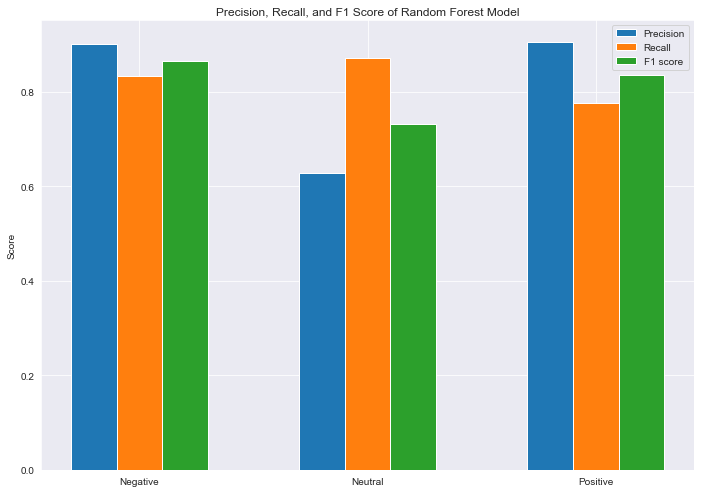

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_rfc, average=None), recall_score(y_test, y_pred_rfc, average=None), f1_score(y_test, y_pred_rfc, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Random Forest Model')
ax.legend()
plt.show()


# CREATING AND TRAINING MODEL FOR SENTIMENTS USING DECISION TREE CLASSIFIER

In [66]:
from sklearn.metrics import classification_report

# Define the new model to use
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred_dt = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy of the model
print('Accuracy:', accuracy_dt)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)

# Print the classification report
report = classification_report(y_test, y_pred_dt, target_names=['Negative-0', 'Neutral-1', 'Positive-2'])
print("Precision, Recall, and F1 Score:")
print(report)




Accuracy: 0.8736842105263158
Confusion Matrix:
 [[ 48   2   4]
 [  1  66   3]
 [  3  23 135]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.92      0.89      0.91        54
   Neutral-1       0.73      0.94      0.82        70
  Positive-2       0.95      0.84      0.89       161

    accuracy                           0.87       285
   macro avg       0.87      0.89      0.87       285
weighted avg       0.89      0.87      0.88       285



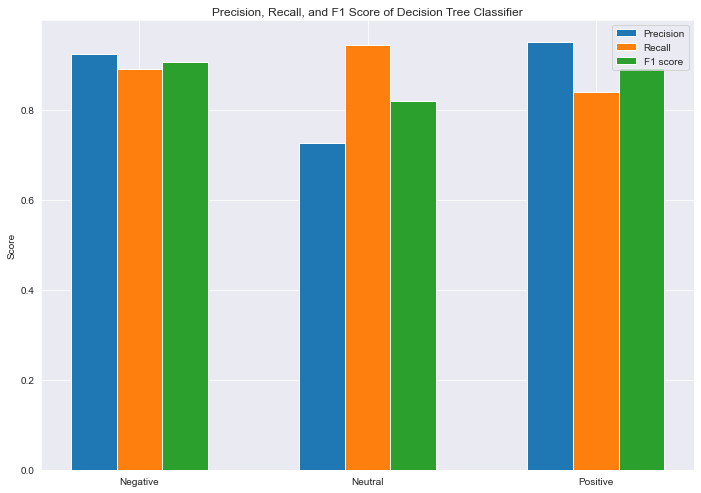

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_dt, average=None), recall_score(y_test, y_pred_dt, average=None), f1_score(y_test, y_pred_dt, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Decision Tree Classifier')
ax.legend()
plt.show()


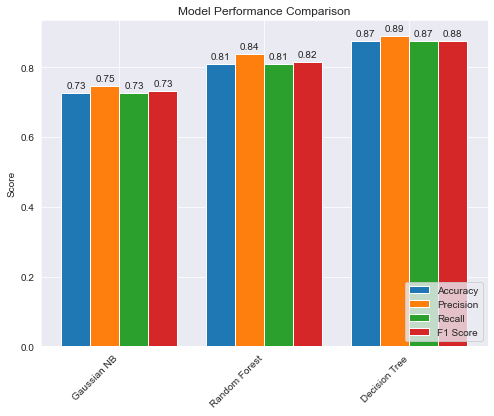

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics
accuracy_scores = [accuracy_gnb, accuracy_rfc, accuracy_dt]
precision_scores = [precision_score(y_test, y_pred_gnb, average='weighted'), 
                    precision_score(y_test, y_pred_rfc, average='weighted'), 
                    precision_score(y_test, y_pred_dt, average='weighted')]
recall_scores = [recall_score(y_test, y_pred_gnb, average='weighted'), 
                 recall_score(y_test, y_pred_rfc, average='weighted'), 
                 recall_score(y_test, y_pred_dt, average='weighted')]
f1_scores = [f1_score(y_test, y_pred_gnb, average='weighted'), 
             f1_score(y_test, y_pred_rfc, average='weighted'), 
             f1_score(y_test, y_pred_dt, average='weighted')]

# Set the x-axis labels
models = ['Gaussian NB', 'Random Forest', 'Decision Tree']

# Define the bar chart settings
x_pos = np.arange(len(models))
width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x_pos - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x_pos, precision_scores, width, label='Precision')
rects3 = ax.bar(x_pos + width, recall_scores, width, label='Recall')
rects4 = ax.bar(x_pos + 2*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add the values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()
